In [33]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import misc
from IPython.display import display, Image
import random as rd
import time
import h5py
origin_root = '/home/hjh/code/git-learn/machine-learning/projects/digit_recognition'

In [18]:
os.chdir(origin_root)
# create the blank class file
def create_blank(train_or_test=0): #0 write train blank data    1 write test blank data:
    if train_or_test:
        os.chdir(os.path.join(origin_root,'pic_test_data'))
    else:
        os.chdir(os.path.join(origin_root,'pic_data'))
    length = len(os.listdir('./A'))
    os.chdir(os.path.join(os.getcwd(),'N'))
    if len(os.listdir('.')) != 0:
        print 'blank file already exist'
    else:
        mat = np.zeros([28,28])
        for i in range(length): 
            save_file_name = str(i)+'.png'
            misc.imsave(save_file_name,mat) 
create_blank() 
create_blank(train_or_test=1)

blank file already exist
blank file already exist


In [45]:

train_append_root = './train_h5_data'
test_append_root = './test_h5_data'
image_size = 28
def process(start_num=0,number=0,train_or_test=0): #0 write train_data  1 write test_data
    os.chdir(origin_root)
    cwd = os.getcwd()
    #print cwd
    pic_root = 'No'#not exist the directory
    for dir in os.listdir('.'):
        if dir == 'pic_data':
            pic_root = os.path.join('.',dir)#picture directory          
    if pic_root != 'No':
        if train_or_test:#deal test picture
            os.chdir(test_append_root)    
        else:#deal train picture
            os.chdir(train_append_root) 
        current_file_num = len(os.listdir('.'))
        #get the root of A,B,...N
        pic_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'N'}
        #get the list root and picture of each class
        dict_pic = {'A':None,'B':None,'C':None,'D':None,'E':None,'F':None,'G':None,'H':None,'I':None,'J':None,'N':None}
        pic_root_dict = {'A':None,'B':None,'C':None,'D':None,'E':None,'F':None,'G':None,'H':None,'I':None,'J':None,'N':None}
        for root in pic_dict.itervalues():
            pic_root_dict[root] = cwd+'/pic_data/'+root
            dict_pic[root] = os.listdir(pic_root_dict[root])
        size_of_class = len(dict_pic['A']) -1   
        exist_file_num = len(os.listdir('.'))#the exist number of h5 file
        print 'exist file number is',exist_file_num
        now_num = start_num
        
        while now_num < start_num + number:
            if now_num < exist_file_num:
                raise Exception('the start number picture should equal to',exist_file_num)
            else:
                pic_mat = []
                save_name = ''
                for cnt in range(5):#select five image root
                    subroot = pic_dict[rd.randint(0,10)]
                    save_name = save_name + subroot
                    idx = rd.choice(range(size_of_class))
                    list_idx = dict_pic[subroot][idx]
                    #start = time.time()
                    try:#read the picture data
                        image_data = ndimage.imread(pic_root_dict[subroot]+'/'+list_idx)
                        
                        pic_mat.append(image_data)
                        if image_data.shape != (image_size,image_size):
                            raise Exception('Unexpected image shape:%s'%str(image_data.shape))    
                    except IOError as e:
                        print('Could not read file',now_num,pic_root_dict[subroot]+'/'+list_idx)
                #to sure that we read the five image        
                if len(pic_mat) == 5:
                    merge_pic = pic_mat[0] 
                    for i in range(4):
                        merge_pic = np.hstack((merge_pic,pic_mat[i+1]))  #combine matrix vertically
                    save_name = str(now_num)+'_'+save_name  
                    try:
                        f = h5py.File(save_name+'.h5','w')              
                        f['data'] = merge_pic
                        #f['labels'] = save_name.split('_')[1]
                        f.close() 
                        now_num = now_num + 1
                    except IOError as e:
                        print('create',save_name+'.h5','failed')
                else:
                    print ('the picture num is',len(pic_mat),'which is not equal to 5')
                #print round(end_time-start_time,6)
                if now_num % (number/10) == 0:
                    print 'current data',now_num
    else:
        print 'picture root directory error'   
 
 

In [44]:
process(number=70000) 
process(number=20000,train_or_test=1) 

exist file number is 0
current data 7000
('Could not read file', 7171, '/home/hjh/code/git-learn/machine-learning/projects/digit_recognition/pic_data/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png')
('the picture num is', 4, 'which is not equal to 5')
('Could not read file', 9258, '/home/hjh/code/git-learn/machine-learning/projects/digit_recognition/pic_data/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png')
('the picture num is', 4, 'which is not equal to 5')
current data 14000
('Could not read file', 17100, '/home/hjh/code/git-learn/machine-learning/projects/digit_recognition/pic_data/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png')
('the picture num is', 4, 'which is not equal to 5')


IndexError: list index out of range

In [46]:
process(start_num=17702,number=70000-17702) 
process(number=20000,train_or_test=1) 

exist file number is 17702
current data 20916
('Could not read file', 22459, '/home/hjh/code/git-learn/machine-learning/projects/digit_recognition/pic_data/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png')
('the picture num is', 4, 'which is not equal to 5')
current data 26145
current data 31374
current data 36603
current data 41832
current data 47061
('Could not read file', 51301, '/home/hjh/code/git-learn/machine-learning/projects/digit_recognition/pic_data/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png')
('the picture num is', 4, 'which is not equal to 5')
current data 52290
('Could not read file', 54070, '/home/hjh/code/git-learn/machine-learning/projects/digit_recognition/pic_data/A/Um9tYW5hIEJvbGQucGZi.png')
('the picture num is', 4, 'which is not equal to 5')
('Could not read file', 56374, '/home/hjh/code/git-learn/machine-learning/projects/digit_recognition/pic_data/D/VHJhbnNpdCBCb2xkLnR0Zg==.png')
('the picture num is', 4, 'which is not equal to 5')
current data 57519
current data 6274

In [53]:
#display some pictures of train set and test set
train_h5_root = 'train_h5_data'
test_h5_root = 'test_h5_data'

train_len = len(os.listdir(os.path.join(origin_root,train_h5_root)))
test_len = len(os.listdir(os.path.join(origin_root,test_h5_root)))
def display_image(train_or_test=0,iamge_num=5):
    os.chdir(origin_root)
    if train_or_test:
        os.chdir(os.path.join(origin_root,test_h5_root))
    else:
        os.chdir(os.path.join(origin_root,train_h5_root))
    
    all_image_root = os.listdir('.')
    len_all_image = len(all_image_root)
    for i in range(iamge_num):
        num = rd.choice(range(len_all_image))
        f = h5py.File(all_image_root[num],'r')   #read h5 file
        image_data = f['data']
        plt.subplot(1,iamge_num,i+1)
        plt.title(((all_image_root[num]).split('_')[1]).split('.')[0])
        plt.imshow(image_data,'gray')
        f.close()

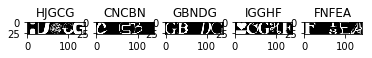

In [55]:
display_image()  

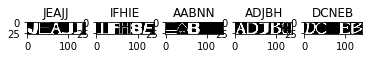

In [56]:
display_image(1) 

In [68]:
origin_root = '/home/hjh/code/git-learn/machine-learning/projects/digit_recognition'
train_h5_root = './train_h5_data'
test_h5_root = './test_h5_data'
train_all_num = 70000
test_all_num = 20000
train_num = 70000
test_num = 10000
valid_num = 10000
image_size = 28
pixel_depth = 255.0
def create_mat(train_or_test=0):
    if train_or_test:
        dataset = np.ndarray((test_num,image_size,5 * image_size),dtype=np.float32)
        labels = np.ndarray(test_num,dtype='|S5')
    else:
        dataset = np.ndarray((train_num,image_size,5 * image_size),dtype=np.float32)
        labels = np.ndarray(train_num,dtype='|S5')
    return dataset,labels
def read_data(train_or_test=0,start=0,read_num=0):
    os.chdir(origin_root)
    if train_or_test:
        os.chdir(test_h5_root)
        dataset,labels = create_mat(train_or_test=1)
    else:
        os.chdir(train_h5_root)
        dataset,labels = create_mat(train_or_test=0)
    data_list = os.listdir('.')
    num = 0
    all_num = len(data_list)
    if len(data_list) in [train_all_num,test_all_num]:
        for data_file in data_list[start:read_num]:
            try:
                #sequence = int(data_file.split('_')[0])
                label = (data_file.split('_')[1]).split('.')[0]
                #print label
                labels[num] = label
                #print type(labels[sequence]),labels[sequence]
                f = h5py.File(data_file,'r')   #read h5 file
                dataset[num,:,:] = f['data']
                dataset[num,:,:] = (dataset[num,:,:] - pixel_depth/2)/pixel_depth
                f.close()
                num = num + 1
            except IOError as e:
                print 'read file',data_file,'error'
            if num % (all_num/10) == 0:
                print 'finish read data %3.0f%%'%(num*100.0/all_num)
    else:
        raise Exception('file num error!')
    return dataset,labels

start = time.time()
train_datas,train_labels = read_data(read_num=train_num,train_or_test=0)
valid_datas,valid_labels = read_data(read_num=valid_num,train_or_test=1)
test_datas,test_labels = read_data(read_num=test_all_num,start=valid_num,train_or_test=1)
end = time.time()
print 'time cost %.0f s'%round(end-start,0)
print 'train set',train_datas.shape,train_labels.shape
print 'valid set',valid_datas.shape,valid_labels.shape
print 'test set',test_datas.shape,test_labels.shape

finish read data  10%
finish read data  20%
finish read data  30%
finish read data  40%
finish read data  50%
finish read data  10%
finish read data  20%
finish read data  30%
finish read data  40%
finish read data  50%
time cost 98 s
train set (70000, 28, 140) (70000,)
valid set (10000, 28, 140) (10000,)
test set (10000, 28, 140) (10000,)


In [69]:
print train_datas[0],train_labels[0]
print valid_datas[0],valid_labels[0]
print test_datas[0],test_labels[0]

[[-0.3392157  -0.22941177 -0.10392157 ...,  0.29607844  0.39803922
  -0.26078433]
 [-0.5        -0.5        -0.5        ...,  0.5         0.47254902
  -0.08431373]
 [-0.49607843 -0.49215686 -0.48823529 ...,  0.27254903  0.0372549
  -0.40196079]
 ..., 
 [-0.49607843 -0.49215686 -0.48823529 ..., -0.5        -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
 [-0.3392157  -0.22941177 -0.10392157 ..., -0.5        -0.5        -0.5       ]] IJNAF
[[-0.5        -0.5        -0.5        ...,  0.48823529  0.48039216
   0.48039216]
 [-0.5        -0.5        -0.5        ...,  0.5         0.5         0.5       ]
 [-0.5        -0.5        -0.49607843 ..., -0.1        -0.10392157
  -0.10392157]
 ..., 
 [-0.5        -0.5        -0.49607843 ..., -0.1        -0.10392157
  -0.10392157]
 [-0.5        -0.5        -0.5        ...,  0.5         0.5         0.5       ]
 [-0.5        -0.5        -0.5        ...,  0.48823529  0.48039216
   0.48039216]] CGBEE

In [70]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_label = labels[permutation]

  return shuffled_dataset, shuffled_label
train_datasets, train_labels = randomize(train_datas, train_labels)
valid_datasets, valid_labels = randomize(valid_datas, valid_labels)
test_datasets, test_labels = randomize(test_datas, test_labels)
print('Train:', train_datasets.shape, train_labels.shape)
print('Valid:', valid_datasets.shape, valid_labels.shape)
print('Test:', test_datasets.shape, test_labels.shape)

('Train:', (70000, 28, 140), (70000,))
('Valid:', (10000, 28, 140), (10000,))
('Test:', (10000, 28, 140), (10000,))


In [ ]:
from six.moves import cPickle as pickle
os.chdir(origin_root)
if 'merge_notMNIST.pickle' in os.listdir('.'):
    print('merge_notMNIST.pickle file already exist')
else:
    pickle_file = os.path.join(origin_root, 'merge_notMNIST.pickle')
    try:
      f = open(pickle_file, 'wb')
      save = {
        'train_dataset': train_datasets,
        'train_labels': train_labels,
        'valid_dataset': valid_datasets,
        'valid_labels': valid_labels,  
        'test_dataset': test_datasets,
        'test_labels': test_labels,
        }
      pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
      f.close()
    except Exception as e:
      print('Unable to save data to', pickle_file, ':', e)
    print('success')

success
